In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib


In [16]:

data=pd.read_csv('/Users/namanranka/Desktop/diagnosify/dataset/liver.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [20]:
data.shape

(579, 11)

In [21]:
data.loc[data['Gender'] == 'Male', 'Gender'] = 1 #replacing Male with 1
data.loc[data['Gender'] == 'Female', 'Gender'] = 0 #replacing Female with 0
data['Gender'].value_counts()


Gender
1    439
0    140
Name: count, dtype: int64

In [23]:

data['Dataset'].value_counts()

Dataset
1    414
0    165
Name: count, dtype: int64

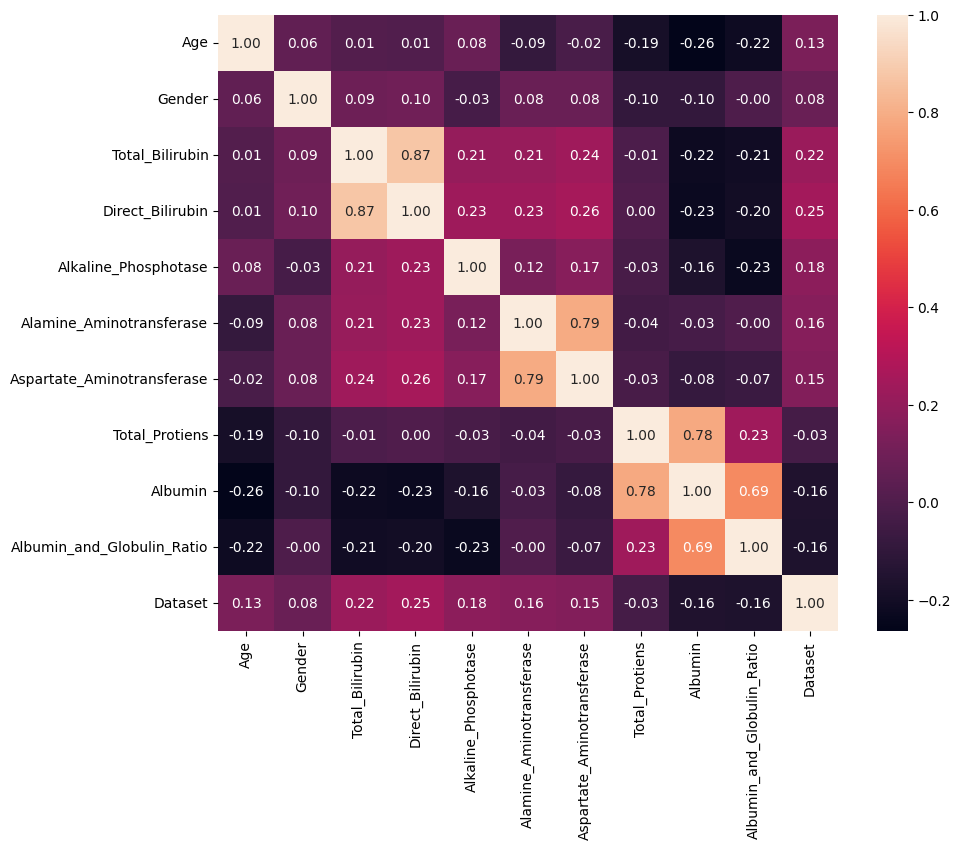

In [24]:

plt.figure(figsize=(10, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f');

In [25]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [26]:
data.groupby('Dataset').mean()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,,
0,41.363636,0.70303,1.144848,0.396364,220.684848,33.836364,40.763636,6.539394,3.339394,1.029576
1,46.144928,0.780193,4.180435,1.931643,319.536232,99.973430,138.173913,6.458696,3.058454,0.914179


In [27]:
X = data.drop(columns='Dataset', axis=1)
Y = data['Dataset']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, stratify=Y, random_state=5)

In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)
random_forest_training_accuracy = random_forest_model.score(X_train, Y_train)
random_forest_testing_accuracy = random_forest_model.score(X_test, Y_test)
print("Random Forest:")
print("Training Accuracy:", random_forest_training_accuracy)
print("Testing Accuracy:", random_forest_testing_accuracy)

Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.729064039408867


In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
X_train_predic=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predic,Y_train)
X_test_predic=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_predic,Y_test)
print(" accuracy : ",training_data_accuracy)

testing accuracy :  0.7207446808510638


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with k=5 (you can adjust k as needed)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, Y_train)

# Evaluate the KNN model
knn_training_accuracy = knn_model.score(X_train, Y_train)
knn_testing_accuracy = knn_model.score(X_test, Y_test)

print("K-Nearest Neighbors (KNN):")
print("Training Accuracy:", knn_training_accuracy)
print("Testing Accuracy:", knn_testing_accuracy)


K-Nearest Neighbors (KNN):
Training Accuracy: 0.773936170212766
Testing Accuracy: 0.6600985221674877


In [38]:
import pickle

# Save the trained Random Forest model to a .sav file
model_filename = 'random_forest_model.sav'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print("Random Forest model saved as", model_filename)


Random Forest model saved as random_forest_model.sav
